<a href="https://colab.research.google.com/github/Netesh5/Astronomical_Data_AstroPy/blob/main/General_Operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from astropy.table import Table
from google.colab import drive

In [ ]:
drive.mount("/content/mydrive")

Mounted at /content/mydrive


# Printing the data

In [ ]:
data=Table.read("/content/mydrive/My Drive/Machine Learning/Astronomy/demo.txt",format="ascii")
print(data)

name  obs_date  mag_b mag_v
---- ---------- ----- -----
 M31 2012-01-02  17.0  17.5
 M31 2012-01-02  17.1  17.4
M101 2012-01-02  15.1  13.5
 M82 2012-02-14  16.2  14.5
 M31 2012-02-14  16.9  17.3
 M82 2012-02-14  15.2  15.5
M101 2012-02-14  15.0  13.6
 M82 2012-03-26  15.7  16.5
M101 2012-03-26  15.1  13.5
M101 2012-03-26  14.8  14.3


# Using pprint function

In [ ]:
data.pprint()

name  obs_date  mag_b mag_v
---- ---------- ----- -----
 M31 2012-01-02  17.0  17.5
 M31 2012-01-02  17.1  17.4
M101 2012-01-02  15.1  13.5
 M82 2012-02-14  16.2  14.5
 M31 2012-02-14  16.9  17.3
 M82 2012-02-14  15.2  15.5
M101 2012-02-14  15.0  13.6
 M82 2012-03-26  15.7  16.5
M101 2012-03-26  15.1  13.5
M101 2012-03-26  14.8  14.3


In [ ]:
data.pprint(show_name=False)

 M31 2012-01-02 17.0 17.5
 M31 2012-01-02 17.1 17.4
M101 2012-01-02 15.1 13.5
 M82 2012-02-14 16.2 14.5
 M31 2012-02-14 16.9 17.3
 M82 2012-02-14 15.2 15.5
M101 2012-02-14 15.0 13.6
 M82 2012-03-26 15.7 16.5
M101 2012-03-26 15.1 13.5
M101 2012-03-26 14.8 14.3


In [ ]:
print(data["name"])

name
----
 M31
 M31
M101
 M82
 M31
 M82
M101
 M82
M101
M101


# Adding new column


In [ ]:
from astropy.table import Column

new_col=Column(range(len(data)),name="new_col")

data.add_column(new_col,index=len(data))

print(data)

name  obs_date  mag_b mag_v new_col
---- ---------- ----- ----- -------
 M31 2012-01-02  17.0  17.5       0
 M31 2012-01-02  17.1  17.4       1
M101 2012-01-02  15.1  13.5       2
 M82 2012-02-14  16.2  14.5       3
 M31 2012-02-14  16.9  17.3       4
 M82 2012-02-14  15.2  15.5       5
M101 2012-02-14  15.0  13.6       6
 M82 2012-03-26  15.7  16.5       7
M101 2012-03-26  15.1  13.5       8
M101 2012-03-26  14.8  14.3       9


# Removing columns

In [ ]:
data.remove_columns(["name","obs_date"])
print(data)

mag_b mag_v new_col
----- ----- -------
 17.0  17.5       0
 17.1  17.4       1
 15.1  13.5       2
 16.2  14.5       3
 16.9  17.3       4
 15.2  15.5       5
 15.0  13.6       6
 15.7  16.5       7
 15.1  13.5       8
 14.8  14.3       9


# Sorting

In [ ]:
data.sort(["mag_b","mag_v"]) # sort by mag_b then if two value have same then sort by mag_v
print(data)

mag_b mag_v new_col
----- ----- -------
 14.8  14.3       9
 15.0  13.6       6
 15.1  13.5       2
 15.1  13.5       8
 15.2  15.5       5
 15.7  16.5       7
 16.2  14.5       3
 16.9  17.3       4
 17.0  17.5       0
 17.1  17.4       1


In [ ]:
data.reverse() # sort in reverse order
print(data)

mag_b mag_v new_col
----- ----- -------
 17.1  17.4       1
 17.0  17.5       0
 16.9  17.3       4
 16.2  14.5       3
 15.7  16.5       7
 15.2  15.5       5
 15.1  13.5       8
 15.1  13.5       2
 15.0  13.6       6
 14.8  14.3       9


# General Coordinates

In [3]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [5]:
c=SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree)
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68458, 41.26917)>


In [6]:
print(c.ra)

10d41m04.488s


In [7]:
print(c.ra.hour)

0.7123053333333335


In [8]:
print(c.ra.hms)

hms_tuple(h=0.0, m=42.0, s=44.299200000000525)


In [9]:
print(c.dec.degree)

41.26917


In [10]:
print(c.dec.radian)

0.7202828960652683


In [11]:
print(c.galactic)

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>


In [12]:
print(c.fk4)

<SkyCoord (FK4: equinox=B1950.000, obstime=B1950.000): (ra, dec) in deg
    (10.00026791, 40.99534531)>


# Radial Velocity Correction

In [13]:
from astropy.coordinates import EarthLocation
from astropy.time import Time

observation_date=Time("2023-09-15")
target=SkyCoord.from_name("M31")
ktm=EarthLocation.of_address("Kathmandu,Nepal")
target.radial_velocity_correction(obstime=observation_date,location=ktm).to("km/s")


<Quantity 14.03871404 km / s>

# FITS Operations (Flexible Image Transport System)

In [16]:
from astropy.io import fits
from google.colab import drive

In [22]:
drive.mount("/content/mydrive")
##Header data Units

hdulist=fits.open("/content/mydrive/My Drive/Machine Learning/Astronomy/example.fits")

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [23]:
hdulist.info()

Filename: /content/mydrive/My Drive/Machine Learning/Astronomy/example.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (512, 512)   int16   


In [26]:
hdulist[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  512 / Axis length                                    
NAXIS2  =                  512 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2017-02-17T04:36:31' / Date FITS file was generated                  
IRAF-TLM= '2017-02-17T04:36:31' / Time of last modification                     
OBJECT  = 'm51  B  600s'       / Name of the object observed                    
IRAF-MAX=           1.993600E4  /  DATA MAX                                     
IRAF-MIN=          -1.000000E0  /  DATA MIN                                     
CCDPICNO=                   

In [34]:
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt



TypeError: ignored

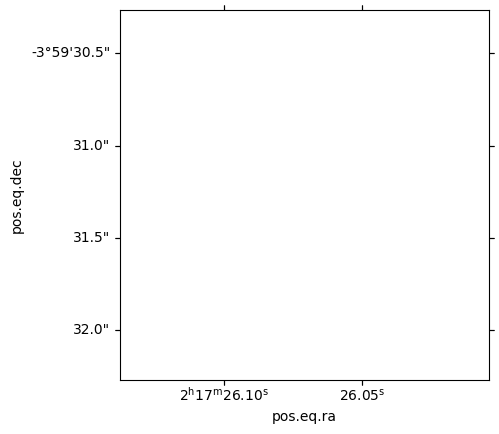

In [39]:

hudlist=fits.open("/content/mydrive/My Drive/Machine Learning/Astronomy/1105_160859.fits")
wcs=WCS(hudlist[0].header)
interval=ZScaleInterval() # It automatically determines the range of pixel value of an Image

vmin,vmax=interval.get_limits(hudlist[0].data)
ax=plt.subplot(111,projection=wcs)
ax.imshow(hudlist[0],cmap="gray_r",vmin=vmin,vmax=vmax,interpolation=None,origin="lower")
ax.coords.grid(color="black",alpha=0.5,linestyle="solid")
ax.plot_coord(SkyCoord("2h17m26s","-3d59m30s",frame="fk5",),"ro")
hudlist.close()